<a href="https://colab.research.google.com/github/yehocoh/The-Season-of-NASDAQ-and-S-P500/blob/main/ML_Final_Project_Data_Analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [ ]:
path="/Users/ohadbenmoshe/Library/Mobile Documents/com~apple~CloudDocs/Hebrew University/סימסטר א תשפג/למידת מכונה/עבודות/Final Project"
os.chdir(path)

In [ ]:
Consolidated_Data = pd.read_csv('Consolidated_Data.csv')
Consolidated_Data.reset_index(inplace=True, drop=True)
Consolidated_Data.head()

,Date,WeekDay,is_holiday,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX
0,2002-07-30 00:00:00-04:00,1,False,1344.189941,1728270000,41.130577,45.574963,31.92
1,2002-07-31 00:00:00-04:00,2,False,1328.260010,1633300000,41.640152,45.992958,32.03
2,2002-08-01 00:00:00-04:00,3,False,1280.000000,1548860000,41.877327,46.182476,36.95
3,2002-08-02 00:00:00-04:00,4,False,1247.920044,1419790000,42.306160,46.539185,41.29
4,2002-08-05 00:00:00-04:00,0,False,1206.010010,1336720000,42.492863,46.773273,45.08


In [ ]:
# Converting format '2002-08-01 00:00:00-04:00' to '2002-08-01'
Consolidated_Data["Date"]=Consolidated_Data.apply(lambda x :x.Date[0:10], axis=1)
# Converting Is_Holiday to 1 or o
Consolidated_Data.loc[Consolidated_Data["is_holiday"] == True, "is_holiday"] = 1
Consolidated_Data.loc[Consolidated_Data["is_holiday"] == False, "is_holiday"] = 0
Consolidated_Data.head()

,Date,WeekDay,is_holiday,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX
0,2002-07-30,1,0,1344.189941,1728270000,41.130577,45.574963,31.92
1,2002-07-31,2,0,1328.260010,1633300000,41.640152,45.992958,32.03
2,2002-08-01,3,0,1280.000000,1548860000,41.877327,46.182476,36.95
3,2002-08-02,4,0,1247.920044,1419790000,42.306160,46.539185,41.29
4,2002-08-05,0,0,1206.010010,1336720000,42.492863,46.773273,45.08


# Predicting Nasdaq Closing Price with Random Forest Classifier

## Comment:
## Algoritms like linear regression, k-nearest neighbors and other models, are based on  distance measurrments. In order to avoid prioritization of certain data, it is required to NORMALIZE the Data in used.
## Random Forest is an ensemble learning algorithm that operates by constructing multiple decision trees and combining their predictions to produce a final output. Hence, normalization is not required.

## Arranging data

### Checking the number of Holidays in the Data Set

In [ ]:
Holidays=Consolidated_Data[Consolidated_Data.is_holiday==1]["is_holiday"].sum()
print("\033[1m"+"Our data set contains only " + "\033[0m", Holidays, "\033[1m"+"Holidays, which is idle comparing to " + "\033[0m", Consolidated_Data.shape[0], "\033[1m"+"of rows in our DataSet"+"\033[0m")

Our data set contains only  46 Holidays, which is idle comparing to  5176 of rows in our DataSet


In [ ]:
Consolidated_Data.drop(["is_holiday"], inplace = True, axis=1)

### Converting 'Close_Nasdaq' to 'Close_Nasdaq_Log'

In [ ]:
import math
Consolidated_Data["Close_Nasdaq_Log"]=Consolidated_Data.apply(lambda x :math.log10(x.Close_Nasdaq), axis=1)

In [ ]:
Consolidated_Data.head()

,Date,WeekDay,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX,Close_Nasdaq_Log
0,2002-07-30,1,1344.189941,1728270000,41.130577,45.574963,31.92,3.128461
1,2002-07-31,2,1328.260010,1633300000,41.640152,45.992958,32.03,3.123283
2,2002-08-01,3,1280.000000,1548860000,41.877327,46.182476,36.95,3.107210
3,2002-08-02,4,1247.920044,1419790000,42.306160,46.539185,41.29,3.096187
4,2002-08-05,0,1206.010010,1336720000,42.492863,46.773273,45.08,3.081351


### Creating Dependent Variables ---> X, Independent Variables--->Y

In [ ]:
X=Consolidated_Data[["Volume_Nasdaq", "Close_Bonds_20more", "Close_Bonds_7to10", "VIX"]].copy()
Y=Consolidated_Data[["Close_Nasdaq", "Close_Nasdaq_Log"]].copy()

### Splitting Data to Test and Train Data Sets

In [ ]:
Proportion=0.80
Train_Size=int(len(X)*Proportion)
X_train=X[:Train_Size].copy()
X_test=X[Train_Size:].copy()
y_train=Y[:Train_Size].copy()
y_test=Y[Train_Size:].copy()
print("Proportion of Train=",Proportion)
print("Data Set Size:", len(X))
print("Shape of X_train:", X_train.shape, 'Shape of y_train:', y_train.shape)
print("Shape of X_test:", X_test.shape, 'Shape of y_test:', y_test.shape)

Proportion of Train= 0.8
Data Set Size: 5176
Shape of X_train: (4140, 4) Shape of y_train: (4140, 2)
Shape of X_test: (1036, 4) Shape of y_test: (1036, 2)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
#Random_Forest = RandomForestRegressor(n_estimators=1000,n_jobs=-1, random_state=5)
Random_Forest.fit(X_train, y_train.Close_Nasdaq_Log)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

## Prediction with X_Train, and converting the log values to Nasdaq Prices with Anti-Log

In [ ]:
Pred_Train=Random_Forest.predict(X_train)
Pred_Train = pd.DataFrame(Pred_Train, columns = ['Log_Pred'])
Pred_Train["Train_Prediction"]=Pred_Train.apply(lambda x :(10 ** x.Log_Pred), axis=1)
Pred_Train.head()

,Log_Pred,Train_Prediction
0,3.128739,1345.050673
1,3.122954,1327.254781
2,3.107981,1282.275133
3,3.097279,1251.062999
4,3.087693,1223.751561


## Performance Evaluation -- Prediction with Train Data Set

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE_Train= mean_absolute_error(y_train.Close_Nasdaq, Pred_Train.Train_Prediction)
Root_MSE_Train=mean_squared_error(y_train.Close_Nasdaq, Pred_Train.Train_Prediction)**0.5
R2=r2_score(y_train.Close_Nasdaq, Pred_Train.Train_Prediction)
score = Random_Forest.score(X_train,y_train.Close_Nasdaq_Log)
print("\033[1m"+f"Mean Absolute Error:     \033[0m {MAE_Train: ,.2f}", "\033[1m"+f"Percent of MAE from Mean: \033[0m {MAE_Train/len(Pred_Train)*100: .2f}","%")
print("\033[1m"+f"Root Mean Squared Error: \033[0m {Root_MSE_Train: ,.2f}", "\033[1m"+f"Percent of RMSE from Mean: \033[0m {Root_MSE_Train/len(Pred_Train)*100: .2f}","%")
print("\033[1m"+f"R Squared:                        \033[0m {R2: ,.2f}")
print("\033[1m"+f"Random Forest Score for Test:     \033[0m {score: ,.4f}")

Mean Absolute Error:       100.76 Percent of MAE from Mean:   2.43 %
Root Mean Squared Error:   200.08 Percent of RMSE from Mean:   4.83 %
R Squared:                          0.99
Random Forest Score for Test:       0.9923


## Prediction with X_Test, and converting the log values to Nasdaq Prices with Anti-Log

In [ ]:
Pred_Test=Random_Forest.predict(X_test)
Pred_Test = pd.DataFrame(Pred_Test, columns = ['Log_Pred'])
Pred_Test["Test_Prediction"]=Pred_Test.apply(lambda x :(10 ** x.Log_Pred), axis=1)
Pred_Test.head()

,Log_Pred,Test_Prediction
0,3.749874,5621.783012
1,3.703884,5056.900101
2,3.685616,4848.597523
3,3.668581,4662.093778
4,3.684104,4831.744014


## Performance Evaluation -- Prediction with Test Data Set

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE_Train= mean_absolute_error(y_test.Close_Nasdaq, Pred_Test.Test_Prediction)
Root_MSE_Train=mean_squared_error(y_test.Close_Nasdaq, Pred_Test.Test_Prediction)**0.5
R2=r2_score(y_test.Close_Nasdaq, Pred_Test.Test_Prediction)
score_2 = Random_Forest.score(X_test,y_test.Close_Nasdaq_Log)
print("\033[1m"+f"Mean Absolute Error:     \033[0m {MAE_Train: ,.2f}", "\033[1m"+f"Percent of MAE from Mean: \033[0m {MAE_Train/y_test.Close_Nasdaq.mean()*100: .2f}","%")
print("\033[1m"+f"Root Mean Squared Error: \033[0m {Root_MSE_Train: ,.2f}", "\033[1m"+f"Percent of RMSE from Mean: \033[0m {Root_MSE_Train/y_test.Close_Nasdaq.mean()*100: .2f}","%")
print("\033[1m"+f"R Squared:                         \033[0m {R2: ,.2f}")
print("\033[1m"+f"Random Forest Score for Train:     \033[0m {score_2: ,.4f}")

Mean Absolute Error:       6,113.41 Percent of MAE from Mean:   54.53 %
Root Mean Squared Error:   6,641.35 Percent of RMSE from Mean:   59.24 %
R Squared:                          -5.64
Random Forest Score for Train:      -10.3422


## Visualisation of Random Forest Accuracy of Prediction

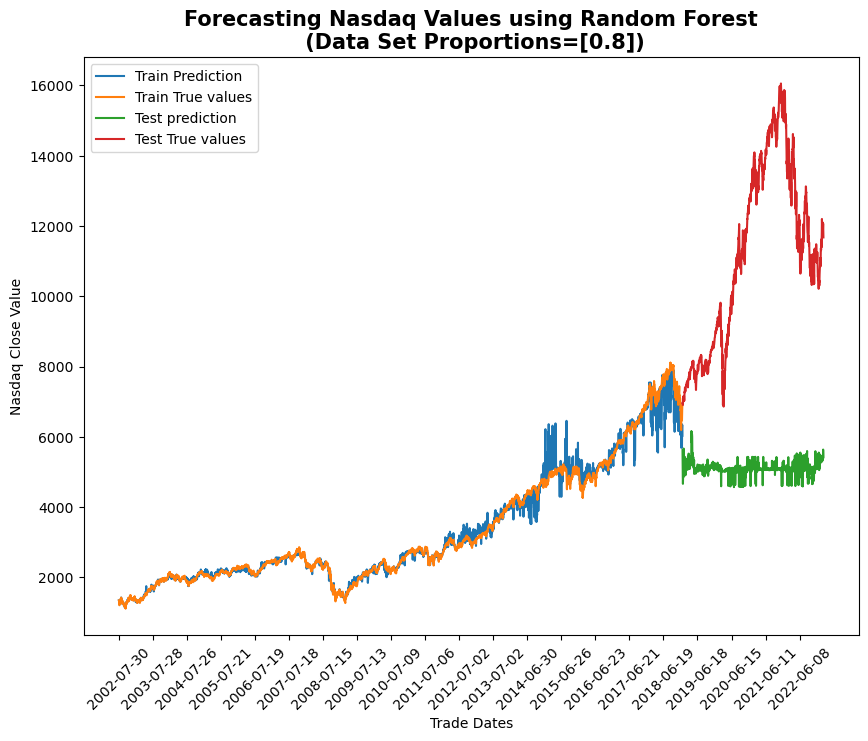

In [ ]:
plt.figure(figsize=(10,7.5))
plt.plot(Consolidated_Data.Date[:Train_Size], Pred_Train.Train_Prediction, label='Train Prediction')
plt.plot(Consolidated_Data.Date[:Train_Size], y_train.Close_Nasdaq, label='Train True values')

plt.plot(Consolidated_Data.Date[Train_Size:], Pred_Test.Test_Prediction, label='Test prediction')
plt.plot(Consolidated_Data.Date[Train_Size:], y_test.Close_Nasdaq, label='Test True values')

plt.xticks(Consolidated_Data.Date[::250], rotation=45)
plt.title("Forecasting Nasdaq Values using Random Forest\n (Data Set Proportions=["+ str(Proportion)+"])", fontsize= 15, fontweight='bold')
plt.xlabel('Trade Dates');
plt.ylabel('Nasdaq Close Value');
plt.legend()

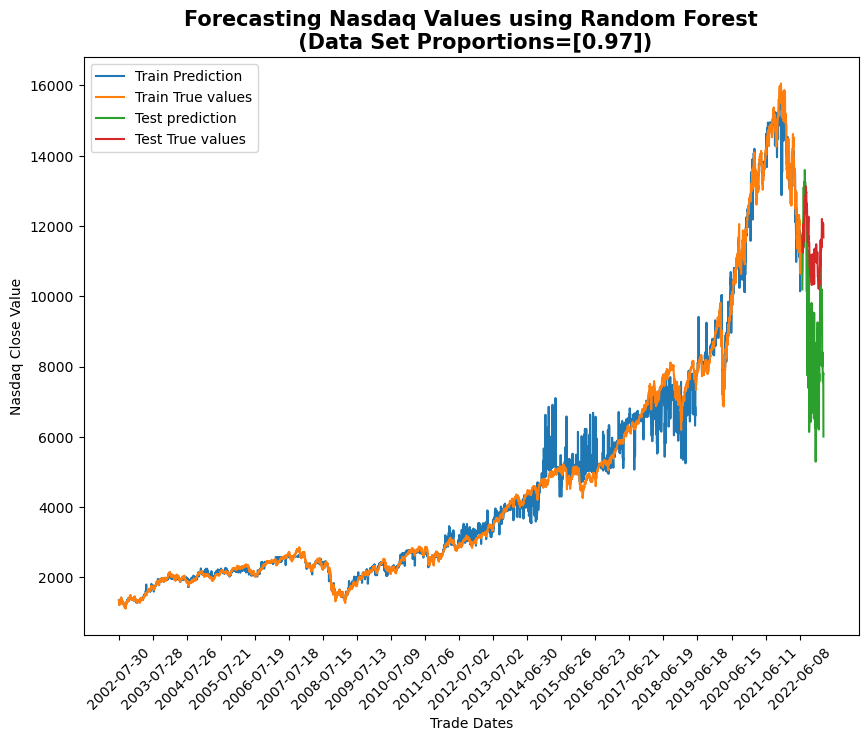

In [ ]:
plt.figure(figsize=(10,7.5))
plt.plot(Consolidated_Data.Date[:Train_Size], Pred_Train.Train_Prediction, label='Train Prediction')
plt.plot(Consolidated_Data.Date[:Train_Size], y_train.Close_Nasdaq, label='Train True values')

plt.plot(Consolidated_Data.Date[Train_Size:], Pred_Test.Test_Prediction, label='Test prediction')
plt.plot(Consolidated_Data.Date[Train_Size:], y_test.Close_Nasdaq, label='Test True values')

plt.xticks(Consolidated_Data.Date[::250], rotation=45)
plt.title("Forecasting Nasdaq Values using Random Forest\n (Data Set Proportions=["+ str(Proportion)+"])", fontsize= 15, fontweight='bold')
plt.xlabel('Trade Dates');
plt.ylabel('Nasdaq Close Value');
plt.legend()

# Forcasting With Moving Average

In [ ]:
Window=90
MV_AVE=Consolidated_Data[["Date", "Close_Nasdaq"]].copy()
MV_AVE['MA'] = MV_AVE['Close_Nasdaq'].rolling(Window).mean()
MV_AVE["SE"]=((MV_AVE['Close_Nasdaq']-MV_AVE['MA'])**2)
MV_AVE['MSe'] = MV_AVE["SE"].rolling(Window).mean()
MV_AVE['SQRT_MSe']=MV_AVE['MSe']**0.5
#MV_AVE=MV_AVE[MV_AVE.MSe>=0]
MV_AVE["Date"]=MV_AVE.apply(lambda x :x.Date[0:10], axis=1)
print("Window=", Window)
MV_AVE

Window= 90


,Date,Close_Nasdaq,MA,SE,MSe,SQRT_MSe
0,2002-07-30,1344.189941,NaN,NaN,NaN,NaN
1,2002-07-31,1328.260010,NaN,NaN,NaN,NaN
2,2002-08-01,1280.000000,NaN,NaN,NaN,NaN
3,2002-08-02,1247.920044,NaN,NaN,NaN,NaN
4,2002-08-05,1206.010010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5171,2023-02-13,11891.790039,11005.777919,7.850175e+05,485145.313270,696.523735
5172,2023-02-14,11960.150391,11014.794705,8.936974e+05,490955.707054,700.682315
5173,2023-02-15,12070.589844,11025.875597,1.091428e+06,498057.931307,705.732195
5174,2023-02-16,11855.830078,11039.247038,6.668079e+05,492566.592060,701.830886


In [ ]:
#print("\033[1m"+f'average of normalized Train set\033[0m {images_train_norm.mean():2.3f}')
print("\033[1m"+f"MSE of Moving Average with 'Window' of 300 is:\033[0m {MV_AVE.SQRT_MSe.mean():2.2f}")
print("\033[1m"+f"MSE is \033[0m {(MV_AVE.SQRT_MSe.mean()/MV_AVE.Close_Nasdaq.mean())*100: 2.2f}", "\033[1m"+"% of Nasdaq average closing price"+"\033[0m")

MSE of Moving Average with 'Window' of 300 is: 295.51
MSE is   6.02 % of Nasdaq average closing price


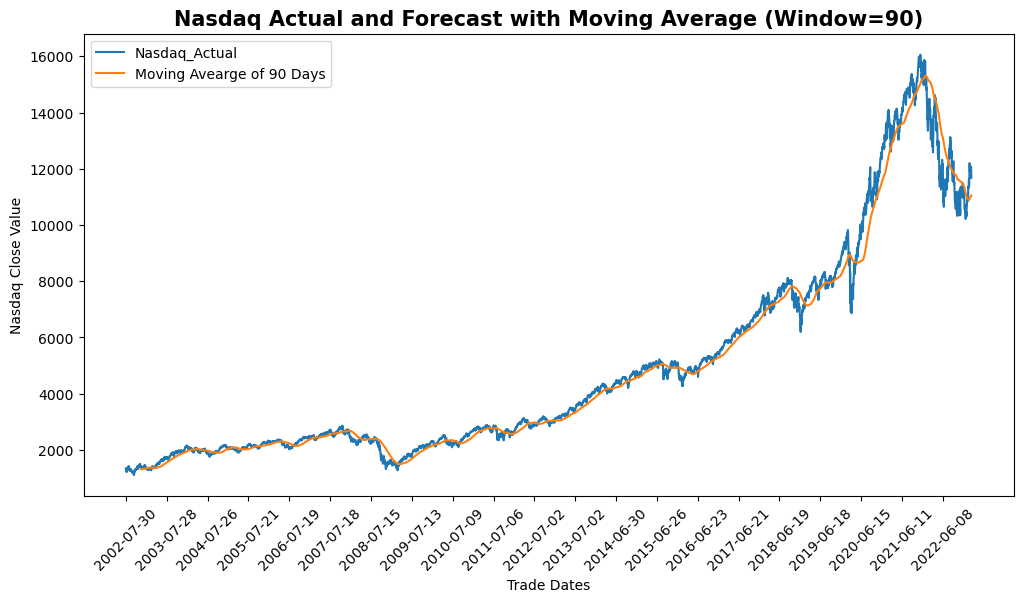

In [ ]:
import matplotlib.dates as dates
plt.figure(figsize=(12,6))

plt.plot(MV_AVE.Date, MV_AVE.Close_Nasdaq, label="Nasdaq_Actual")
plt.plot(MV_AVE.Date.iloc[Window:], MV_AVE.MA.iloc[Window:], label="Moving Avearge of " + str(Window)+ " Days")

plt.xticks(MV_AVE.Date[::250], rotation=45)
plt.legend(loc="upper left")
plt.title("Nasdaq Actual and Forecast with Moving Average " + "(Window=" + str(Window)+")", fontsize= 15, fontweight='bold')
plt.xlabel('Trade Dates')
plt.ylabel('Nasdaq Close Value')
plt.show()

## Forecasting with LSTM


## Normalizing DATA

In [ ]:
LSTM_Data=Consolidated_Data.copy()
LSTM_Data

,Date,WeekDay,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX,Close_Nasdaq_Log
0,2002-07-30,1,1344.189941,1728270000,41.130577,45.574963,31.92,3.128461
1,2002-07-31,2,1328.260010,1633300000,41.640152,45.992958,32.03,3.123283
2,2002-08-01,3,1280.000000,1548860000,41.877327,46.182476,36.95,3.107210
3,2002-08-02,4,1247.920044,1419790000,42.306160,46.539185,41.29,3.096187
4,2002-08-05,0,1206.010010,1336720000,42.492863,46.773273,45.08,3.081351
...,...,...,...,...,...,...,...,...
5171,2023-02-13,0,11891.790039,4752880000,104.260002,97.190002,20.34,4.075247
5172,2023-02-14,1,11960.150391,5032430000,104.019997,96.750000,18.91,4.077737
5173,2023-02-15,2,12070.589844,5056640000,103.050003,96.459999,18.23,4.081728
5174,2023-02-16,3,11855.830078,5159410000,101.589996,96.139999,20.17,4.073932


In [ ]:
sc_Close_Price = MinMaxScaler()
sc_Close_Price.fit(LSTM_Data[["Close_Nasdaq_Log"]] )
LSTM_Data[["Close_Nasdaq_Log"]] = sc_Close_Price.transform(LSTM_Data[["Close_Nasdaq_Log"]])

In [ ]:
def normalizing(Col_Name):
    global sc
    sc = MinMaxScaler()
    sc.fit(LSTM_Data[[Col_Name]] )
    LSTM_Data[[Col_Name]] = sc.transform(LSTM_Data[[Col_Name]] )

In [ ]:

normalizing("Volume_Nasdaq")
normalizing("Close_Bonds_20more")
normalizing("Close_Bonds_7to10")
normalizing("VIX")
LSTM_Data.head()

,Date,WeekDay,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX,Close_Nasdaq_Log
0,2002-07-30,1,1344.189941,0.132182,0.000000,0.000000,0.309721,0.070363
1,2002-07-31,2,1328.260010,0.123851,0.004155,0.005681,0.311217,0.065894
2,2002-08-01,3,1280.000000,0.116444,0.006088,0.008257,0.378110,0.052023
3,2002-08-02,4,1247.920044,0.105122,0.009585,0.013104,0.437118,0.042510
4,2002-08-05,0,1206.010010,0.097835,0.011107,0.016286,0.488647,0.029707


In [ ]:
history_samples=300
horizon_samples=150
Split_Proportion=0.7

train_size = int(len(LSTM_Data) * Split_Proportion)-(history_samples+horizon_samples)
test_size = len(LSTM_Data) - (train_size  + history_samples + horizon_samples)

train_data = LSTM_Data.iloc[:train_size].copy()
test_data = LSTM_Data.iloc[-test_size:].copy()

In [ ]:
print(f'Data set: {len(LSTM_Data)}. history size: {history_samples}. Prediction window size: {horizon_samples} ')
print(f'Data set: \t From: {LSTM_Data.index[0]} to {LSTM_Data.index[-1]}')
print(f"Train set: {len(train_data)}: from {train_data.index[0]} to: {train_data.index[-1]}")
print(f"Test set: {len(test_data)}: from {test_data.index[0]} to: {test_data.index[-1]}")
print(f"sample size: x: {trainX[0].shape}, y: {trainY[0].shape}")

Data set: 5176. history size: 300. Prediction window size: 150 
Data set: 	 From: 0 to 5175
Train set: 3173: from 0 to: 3172
Test set: 1553: from 3623 to: 5175
sample size: x: (300, 4), y: (150, 1)


In [ ]:
def sliding_windows(data, history_samples, horizon_samples):
    x = []
    y = []

    for i in range(len(data)-history_samples-horizon_samples):
        _x = data.iloc[i:(i+history_samples), 2:6]
        _y = data.iloc[i+history_samples:i+history_samples+horizon_samples, 7:8]
        x.append(_x)
        y.append(_y)
    return np.array(x),np.array(y)

In [ ]:
trainX, trainY = sliding_windows(train_data, history_samples, horizon_samples)
testX, testY = sliding_windows(test_data, history_samples, horizon_samples)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,  Dense, Reshape, Dropout

In [ ]:
def generate_model(lstm_hidden_dim, num_lstm_layers, output_dim):

    model =  Sequential()
    for lstm_layer_index in range(num_lstm_layers):
        is_last_layer = (lstm_layer_index + 1) < num_lstm_layers
        model.add(LSTM(units=lstm_hidden_dim, return_sequences=is_last_layer , activation="tanh") )
    model.add(Dense(300, activation="linear"))
    model.add(Dense(100, activation="linear"))
    model.add(Dense(output_dim, activation=None))
    model.add(Reshape( (output_dim, 1)))
    return model

In [ ]:
model = generate_model(lstm_hidden_dim=100, num_lstm_layers=1, output_dim =testY.shape[1])
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=200, verbose=1)
LSTM_Model=pd.DataFrame(history.history)
LSTM_Model.to_csv("LSTM_Model.csv")


Epoch 1/15
14/14 [==============================] - 9s 504ms/step - loss: 0.0611 - val_loss: 0.2923
Epoch 2/15
14/14 [==============================] - 8s 550ms/step - loss: 0.0124 - val_loss: 0.2829
Epoch 3/15
14/14 [==============================] - 7s 533ms/step - loss: 0.0098 - val_loss: 0.2766
Epoch 4/15
14/14 [==============================] - 9s 632ms/step - loss: 0.0076 - val_loss: 0.2031
Epoch 5/15
14/14 [==============================] - 9s 626ms/step - loss: 0.0044 - val_loss: 0.1185
Epoch 6/15
14/14 [==============================] - 10s 699ms/step - loss: 0.0027 - val_loss: 0.0864
Epoch 7/15
14/14 [==============================] - 10s 701ms/step - loss: 0.0024 - val_loss: 0.0884
Epoch 8/15
14/14 [==============================] - 10s 707ms/step - loss: 0.0024 - val_loss: 0.0908
Epoch 9/15
14/14 [==============================] - 10s 716ms/step - loss: 0.0024 - val_loss: 0.0907
Epoch 10/15
14/14 [==============================] - 10s 743ms/step - loss: 0.0025 - val_loss: 0

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               42000     
                                                                 
 dense_24 (Dense)            (None, 300)               30300     
                                                                 
 dense_25 (Dense)            (None, 100)               30100     
                                                                 
 dense_26 (Dense)            (None, 150)               15150     
                                                                 
 reshape_8 (Reshape)         (None, 150, 1)            0         
                                                                 
Total params: 117,550
Trainable params: 117,550
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'LSTM Model - Loss and Validation Loss')

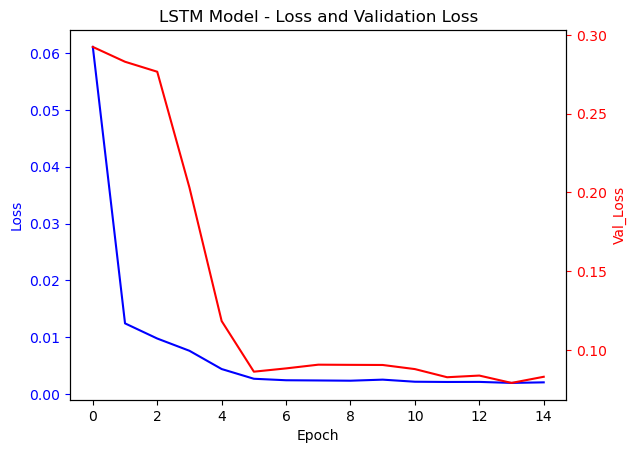

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(LSTM_Model[['loss']], 'b-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(LSTM_Model[['val_loss']], 'r-')
ax2.set_ylabel('Val_Loss', color='r')
ax2.tick_params('y', colors='r')
plt.title("LSTM Model - Loss and Validation Loss")

## Performance Evaluation -- Prediction with Train Data Set

In [ ]:
MAE_Train/Actual_Data_Train["True_Val_Actual"].mean()*100

306.97731786213905

In [ ]:
train_accuracy = model.evaluate(trainX, trainY)
print(f"test accuracy: {train_accuracy}")

86/86 [==============================] - 3s 37ms/step - loss: 0.0020
test accuracy: 0.001998670632019639


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE_Train= mean_absolute_error(Actual_Data_Train["True_Val_Actual"], Pred_Data_Train["True_Val_Pred"])
Root_MSE_Train=mean_squared_error(Actual_Data_Train["True_Val_Actual"], Pred_Data_Train["True_Val_Pred"])**0.5
R2=r2_score(Actual_Data_Train["True_Val_Actual"], Pred_Data_Train["True_Val_Pred"])
Ave=Actual_Data_Train["True_Val_Actual"].mean()
print("\033[1m"+f"Mean Absolute Error:     \033[0m {MAE_Train: ,.2f}", "\033[1m"+f"Percent of MAE from Mean: \033[0m {MAE_Train/Ave*100: .4f}","%")
print("\033[1m"+f"Root Mean Squared Error: \033[0m {Root_MSE_Train: ,.2f}", "\033[1m"+f"Percent of MAE from Mean: \033[0m {(Root_MSE_Train/Ave)*100: .4f}","%")
print("\033[1m"+f"R Squared:                 \033[0m {R2: ,.2f}")


Mean Absolute Error:       182.36 Percent of MAE from Mean:   9.1569 %
Root Mean Squared Error:   195.02 Percent of MAE from Mean:   9.7927 %
R Squared:                  -7.36


###  Converting Normalized Log to Log  with inverse_transform, and Log to Nasdaq Price with Inverse Log

In [ ]:
pred_Train=model.predict(trainX)
pred_train_Y = pred_Train[0:1].reshape(-1,1)
true_train_Y = trainY[0:1].reshape(-1,1)
Pred_Data_Train=pd.DataFrame(sc_Close_Price.inverse_transform(pred_train_Y), columns = ['Log_Pred'])
Actual_Data_Train=pd.DataFrame(sc_Close_Price.inverse_transform(true_train_Y), columns = ['Log_Actual'])
Pred_Data_Train["True_Val_Pred"]=Pred_Data_Train.apply(lambda x :(10**x.Log_Pred), axis=1)
Actual_Data_Train["True_Val_Actual"]=Actual_Data_Train.apply(lambda x :(10**x.Log_Actual), axis=1)

86/86 [==============================] - 3s 34ms/step


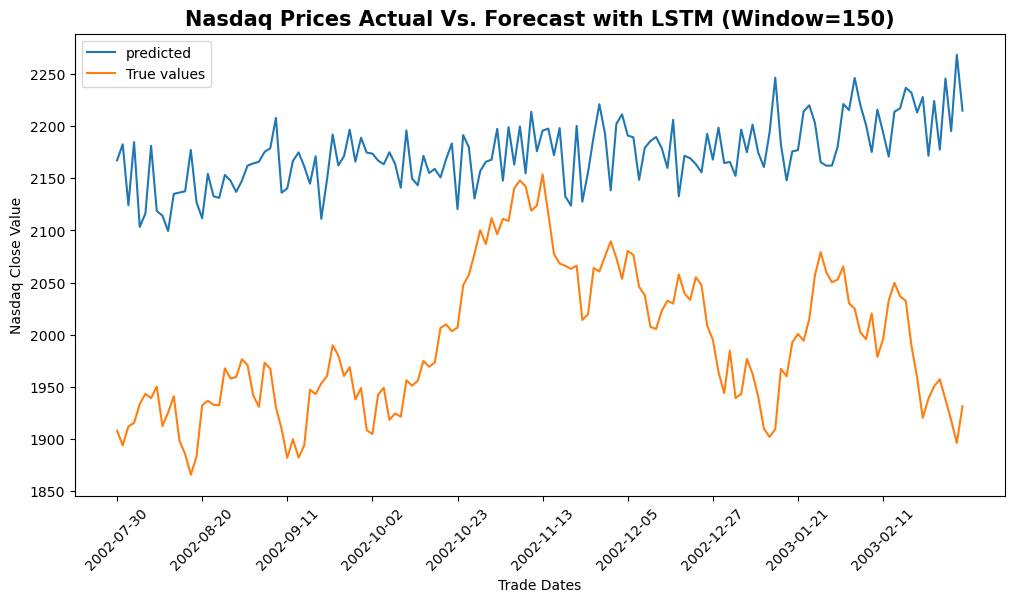

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(LSTM_Data.Date[0:150], Pred_Data_Train["True_Val_Pred"], label='predicted')
plt.plot(LSTM_Data.Date[:150], Actual_Data_Train["True_Val_Actual"], label='True values')
plt.xticks(LSTM_Data.Date[0:150:15], rotation=45)
plt.xlabel('Trade Dates');
plt.ylabel('Nasdaq Close Value')
plt.title("Nasdaq Prices Actual Vs. Forecast with LSTM " + "(Window=" + str(horizon_samples)+")", fontsize= 15, fontweight='bold')
plt.legend()

## Performance Evaluation -- Prediction with Test Data Set

In [ ]:
test_accuracy = model.evaluate(testX, testY)
print(f"test accuracy: {test_accuracy}")

35/35 [==============================] - 1s 35ms/step - loss: 0.0831
test accuracy: 0.08313030749559402


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE_Train= mean_absolute_error(Actual_Data_Test["True_Val_Actual"], Pred_Data_Test["True_Val_Pred"])
Root_MSE_Train=mean_squared_error(Actual_Data_Test["True_Val_Actual"], Pred_Data_Test["True_Val_Pred"])**0.5
R2=r2_score(Actual_Data_Test["True_Val_Actual"], Pred_Data_Test["True_Val_Pred"])
Ave=Actual_Data_Test["True_Val_Actual"].mean()
print("\033[1m"+f"Mean Absolute Error:     \033[0m {MAE_Train: ,.2f}", "\033[1m"+f"Percent of MAE from Mean: \033[0m {MAE_Train/Ave*100: .4f}","%")
print("\033[1m"+f"Root Mean Squared Error: \033[0m {Root_MSE_Train: ,.2f}", "\033[1m"+f"Percent of MAE from Mean: \033[0m {(Root_MSE_Train/Ave)*100: .4f}","%")
print("\033[1m"+f"R Squared:                 \033[0m {R2: ,.2f}")


Mean Absolute Error:       2,538.41 Percent of MAE from Mean:   33.5257 %
Root Mean Squared Error:   2,552.39 Percent of MAE from Mean:   33.7103 %
R Squared:                  -58.86


In [ ]:
pred_Test=model.predict(testX)
pred_test_Y = pred_Test[0:1].reshape(-1,1)
true_test_Y = testY[0:1].reshape(-1,1)

Pred_Data_Test=pd.DataFrame(sc_Close_Price.inverse_transform(pred_test_Y), columns = ['Log_Pred'])
Actual_Data_Test=pd.DataFrame(sc_Close_Price.inverse_transform(true_test_Y), columns = ['Log_Actual'])
Pred_Data_Test["True_Val_Pred"]=Pred_Data_Test.apply(lambda x :(10**x.Log_Pred), axis=1)
Actual_Data_Test["True_Val_Actual"]=Actual_Data_Test.apply(lambda x :(10 ** x.Log_Actual), axis=1)

35/35 [==============================] - 1s 40ms/step


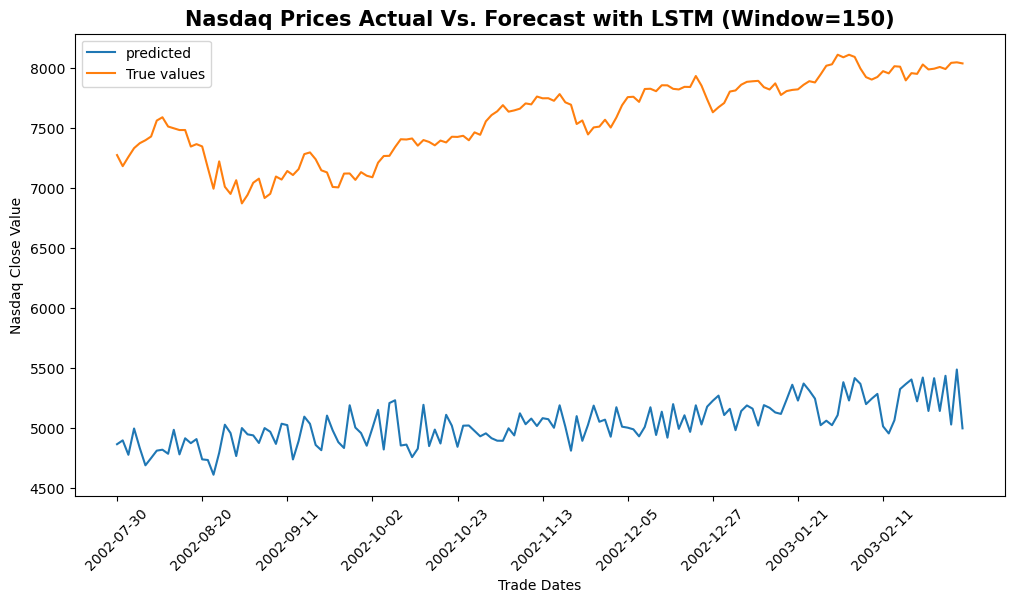

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(LSTM_Data.Date[0:150], Pred_Data_Test["True_Val_Pred"], label='predicted')
plt.plot(LSTM_Data.Date[0:150], Actual_Data_Test["True_Val_Actual"], label='True values')
plt.xticks(LSTM_Data.Date[0:150:15], rotation=45)
plt.xlabel('Trade Dates');
plt.ylabel('Nasdaq Close Value')
plt.title("Nasdaq Prices Actual Vs. Forecast with LSTM " + "(Window=" + str(horizon_samples)+")", fontsize= 15, fontweight='bold')
plt.legend()

## Calculating MSE as function of Prediction Horizon

In [ ]:
from sklearn.metrics import mean_squared_error
predY = model.predict(testX, batch_size=200) # extract only the first time point for each of the 200 predictions.
trueY = testY
mse = np.zeros( (predY.shape[1],) , dtype=np.float32)
for time_offset in range(predY.shape[1]):
    mse[time_offset] = mean_squared_error(y_true=trueY[:,time_offset, 0], y_pred= predY[:,time_offset, 0])

6/6 [==============================] - 1s 109ms/step


Text(0.5, 1.0, "MSE as function of the Prediction's Horizon")

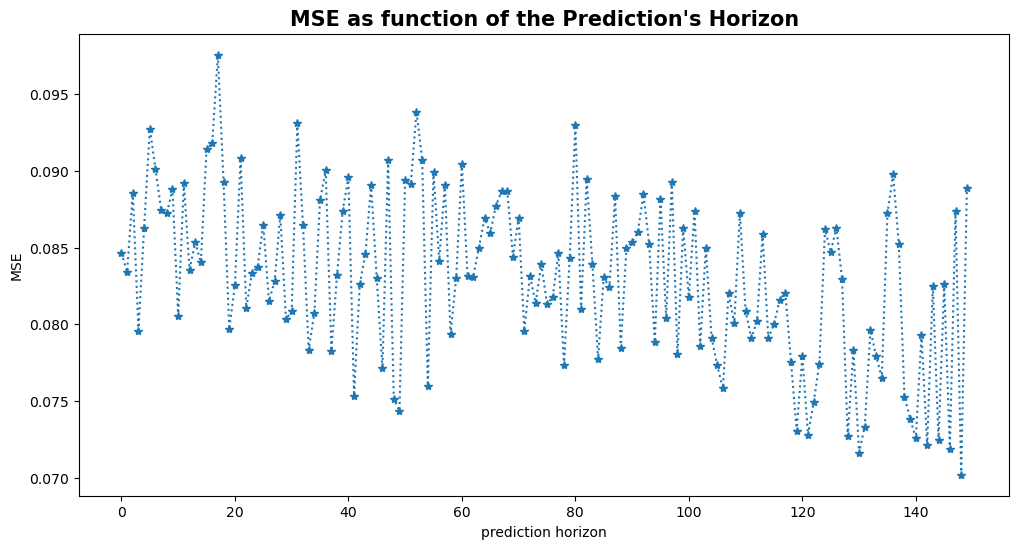

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(mse, '*:')
plt.xlabel('prediction horizon')
plt.ylabel('MSE')
plt.title("MSE as function of the Prediction's Horizon", fontsize= 15, fontweight='bold')